In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
import warnings

warnings.filterwarnings('ignore')

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Final/BID_Stock_Data.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna()  # Drop missing values

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna()  # Drop missing values
df = df.reset_index(drop=True)  # Reset the index


                    Open          High           Low         Close  \
Date                                                                 
2014-01-27  13193.956055  13264.512695  12770.621094  12982.289063   
2014-02-06  12841.176758  12911.732422  12417.841797  12417.841797   
2014-02-07  12276.729492  12347.285156  11641.726563  11712.282227   
2014-02-10  11641.726563  12135.618164  11430.058594  11994.505859   
2014-02-11  12135.618164  12135.618164  11923.950195  11923.950195   

               Adj Close     Volume  
Date                                 
2014-01-27  12982.289063  4593392.0  
2014-02-06  12417.841797  1360040.0  
2014-02-07  11712.282227  4234371.0  
2014-02-10  11994.505859  5771436.0  
2014-02-11  11923.950195  2747437.0  


In [ ]:
# 2. chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']]  # Biến phụ thuộc theo mảng 2 chiều

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index  # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình Random Forest
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Ví dụ các giá trị cho số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Ví dụ các giá trị cho độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Ví dụ các giá trị cho số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4]  # Ví dụ các giá trị cho số lượng mẫu tối thiểu ở lá
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
rf_model = grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 271091.6005749502


In [ ]:
# dự đoán test
y_pred = rf_model.predict(x_test)
y_pred

array([34325.14272422, 34789.59898374, 34280.57276169, 34696.64979521,
       34222.46204136, 35094.59602884, 36545.31682764, 36850.35898627,
       35226.13850815, 34991.89928902, 36869.20055932, 35577.49201561,
       36932.28240093, 36869.20055932, 36540.15662327, 36869.20055932,
       36555.52172778, 36869.20055932, 38997.03564381, 39622.77912672,
       39664.13863524, 40657.28619448, 40737.10264548, 39066.3299706 ,
       39119.49641104, 39664.13863524, 37717.94305477, 38361.07086153,
       38999.80549321, 39665.57177062, 39187.93633279, 38999.80549321,
       38963.38151268, 38731.87404614, 39050.35250557, 38769.74335635,
       38999.80549321, 39356.68413357, 39626.20364964, 39567.99082249,
       40430.28295602, 39664.13863524, 39664.13863524, 39050.35250557,
       38983.3589831 , 39654.07340085, 40756.7361611 , 40756.7361611 ,
       39676.59993313, 39676.59993313, 41442.91473328, 41442.91473328,
       39638.18342395, 40350.00311832, 40657.28619448, 39626.20364964,
      

In [ ]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1, 1)
last_data

array([[41600.]])

In [ ]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = rf_model.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1, 1)
x_next_30_days

[array([40350.00311832]),
 array([39681.9023099]),
 array([39001.87191725]),
 array([38362.82320878]),
 array([37637.98991422]),
 array([36631.25485575]),
 array([36224.29928007]),
 array([35433.52198633]),
 array([34304.62332876]),
 array([32371.08224578]),
 array([31939.38138357]),
 array([31620.28315086]),
 array([30765.38787211]),
 array([30251.55601212]),
 array([29667.5872358]),
 array([29000.63485318]),
 array([28717.53388381]),
 array([28330.70615837]),
 array([27909.17501823]),
 array([27688.5311269]),
 array([27462.8660464]),
 array([27243.58792844]),
 array([26702.471813]),
 array([26581.60281216]),
 array([26332.57996163]),
 array([25970.25601359]),
 array([25194.66220845]),
 array([24795.96015239]),
 array([24482.47510222]),
 array([24205.73590795])]

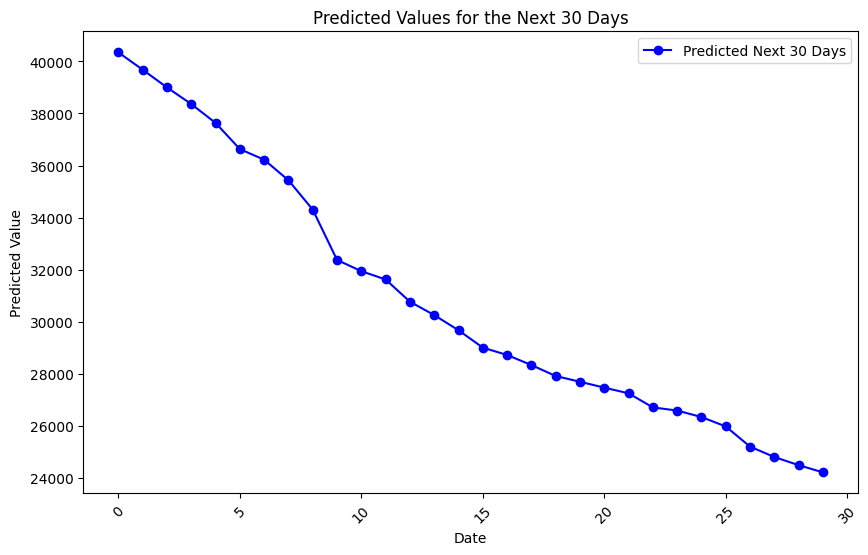

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1, 1)

In [ ]:
# 7. Đánh giá độ chính xác test bằng RMSE, MSLE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)
# MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)

Testing RMSE: Close    909.695786
dtype: float64
Testing MAPE: 0.016896468987067457
Testing MSLE: 0.0005193694947582515


In [ ]:
# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index + 30, step=1)

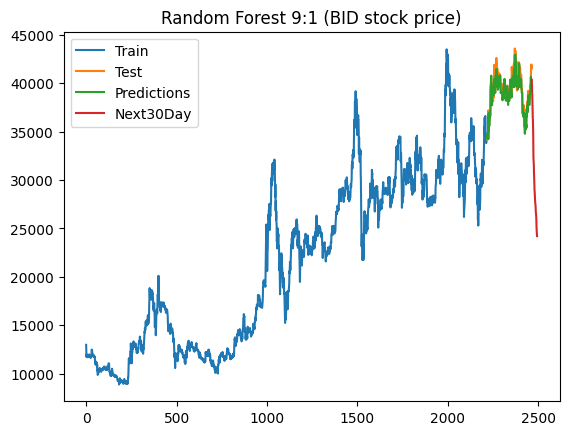

In [ ]:
# 9.Vẽ hình
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates, x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.title('Random Forest 9:1 (BID stock price)')
plt.show()